In [4]:
import pandas
import numpy
import matplotlib.pyplot as plot
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

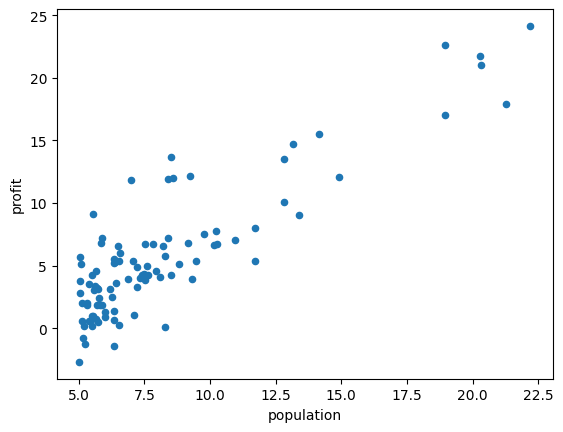

In [14]:
# Load data and plot it
data = pandas.read_csv('data.csv')
data.plot(kind='scatter', x='population', y='profit')
plot.show()

In [22]:
# Shuffle the data, extract x and y (features and labels)
data = shuffle(data)
x = data['population'].to_numpy().reshape((-1,1))
y = data['profit'].to_numpy().reshape((-1,1))

# (manual splitting, or we can use train_test_split instead)
x_train = x[0:80]
y_train = y[0:80]
x_test = x[80:]
y_test = y[80:]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Coefficients: 
 [[1.23074787]]   [-4.25715253]
Mean squared error: 6.41


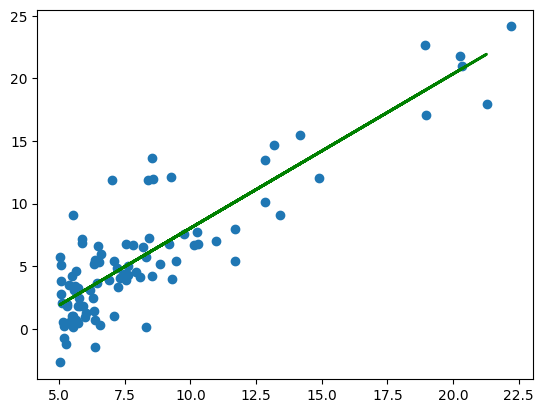

In [29]:
# Train the model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
print('Coefficients: \n', model.coef_, " ", model.intercept_)

# Make predictions and evaluate
y_pred = model.predict(x_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

# Visualize the results
plot.scatter(x, y)
plot.plot(x_test, y_pred, color='green', linewidth=2)
plot.show()

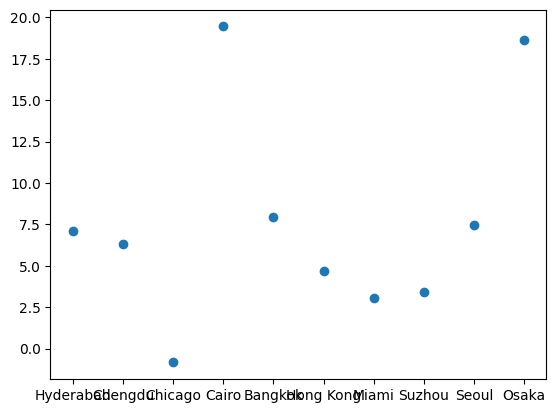

In [21]:
# Predicting for new data
new_pop_data = pandas.read_csv("cities.csv", names=['city','population'])
new_data = new_pop_data['population'].to_numpy().reshape(-1,1)
predictions = model.predict(new_data) # predicting profits for new data

# plotting predictions on a scatter plot for each city
plot.scatter(new_pop_data['city'], predictions)